In [7]:
from Bio import SeqIO
import json 
from tqdm import tqdm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

** copying robs work into this directory ** 

In [1]:
#!cp -r ../../../../mutation_equilibrium/analysis/coding_v_noncoding_mutability/ ./gettingCdsIntergenic/

In [2]:
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

**CDS**

In [3]:
cds_count = 0
for record in tqdm(SeqIO.parse(open("gettingCdsIntergenic/cds.nonOverlapping.fasta"), "fasta")):
    cds_count+= 1

209836it [00:01, 175879.26it/s]


In [4]:
print("total CDS sequences = ", cds_count)

total CDS sequences =  209836


In [17]:
global_cds_mut_list = []
tmp = 0
for record in tqdm(SeqIO.parse(open("gettingCdsIntergenic/cds.nonOverlapping.fasta"), "fasta")): #takes a few mins 
    current_cds_mut_list = []
    for i in range(1, len(record.seq)-1): 
        triplet = str(record.seq[i-1:i+2]).upper()
        mut = model[triplet][0]
        current_cds_mut_list.append(mut)
        tmp+= 1
    global_cds_mut_list.extend(current_cds_mut_list)


209836it [01:10, 2992.63it/s]


In [20]:
cds_mean_mut = np.mean(global_cds_mut_list)
cds_stderr_mut = np.std(global_cds_mut_list)/np.sqrt(len(global_cds_mut_list))

In [24]:
cds_mean_mut

4.4897492259411877e-05

**intergenic now** 

In [31]:
print("total intergenic sequences =  ", 30265)
intergnic_nseq = 30265

total intergenic sequences =   30265


In [26]:
global_inter_mut_list = [] #the global list where all the mutabilityies will be appended
intergenic_object = open("gettingCdsIntergenic/intergenic.fasta")
for record in tqdm(SeqIO.parse(intergenic_object, "fasta")): #takes maybe an hour or two 
    current_inter_mut_list = [] #makign as sub list for each intergenic region (where all the muts for that region are appended)
    for i in range(1, len(record.seq)-1): #for every centre triplet base in the region: 
        triplet = str(record.seq[i-1:i+2]).upper() #define the triplet ans capitalize 
        if "N" in triplet: 
            continue #skips the rest of the loop for those entires with Ns in them 
        mut = model[triplet][0]  # if no Ns, get the mutability 
        current_inter_mut_list.append(mut) # appedn the mutability to the current list 
    global_inter_mut_list.extend(current_inter_mut_list) #extend the global list by the current (i think this method is fasetr for python, rather than just appeneding t the global each time)


30452it [52:35,  9.65it/s] 


In [27]:
intergenic_mut = np.mean(global_inter_mut_list)
intergenic_mut_stderr = np.std(global_inter_mut_list)/np.sqrt(len(global_inter_mut_list))

In [30]:
intergenic_mut, intergenic_mut_stderr

(3.16788354502687e-05, 9.531475615642966e-10)

** printing to df ** 

In [32]:
data_dict = {"intergenic":[intergenic_mut,intergenic_mut_stderr, intergnic_nseq, len(global_inter_mut_list)], "cds":[cds_mean_mut,cds_stderr_mut,cds_count, len(global_cds_mut_list)]}

In [46]:
data_df = pd.DataFrame.from_dict(data_dict, orient = "index")
data_df["seqeunce_class"] = list(data_df.index) # extract rownames into column 

In [57]:
data_df

,mutability_av,mutability_stderr,n_seqs,n_sites,seqeunce_class
intergenic,0.000032,9.531476e-10,30265,1632535849,intergenic
cds,0.000045,1.135687e-08,209836,35258968,cds


In [36]:
data_df.to_csv("global_cds_intergenic_mutability_2022_01_04.csv")

** testing that my code actually worked ** 

In [84]:
cds_length = 0
for record in SeqIO.parse(open("gettingCdsIntergenic/cds.fasta"), "fasta"): 
    cds_length += len(record.seq)

In [99]:
cds_length, len(global_cds_mut_list), len(global_cds_mut_list) + (2*1294782)

(199915601, 197326285, 199915849)

In [90]:
inter_length = 0
for record in SeqIO.parse(open("gettingCdsIntergenic/intergenic.fasta"), "fasta"): 
    inter_length += len(record.seq)

In [100]:
inter_length, len(global_inter_mut_list)

(1716159126, 1632535849)

In [58]:
data_df

,mutability_av,mutability_stderr,n_seqs,n_sites,seqeunce_class
intergenic,0.000032,9.531476e-10,30265,1632535849,intergenic
cds,0.000045,1.135687e-08,209836,35258968,cds


In [44]:
list(data_df.columns)

['Unnamed: 0', 'mutability', 'n_seqs', 'n_sites']

<ErrorbarContainer object of 3 artists>

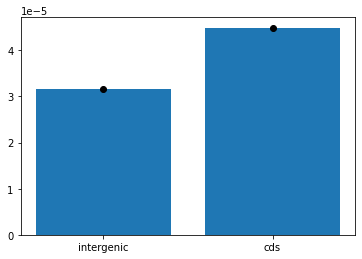

In [65]:
plt.bar(x=data_df.seqeunce_class,height= data_df.mutability_av)
plt.errorbar(data_df.seqeunce_class, data_df.mutability_av, yerr=data_df.mutability_stderr,color="black",fmt="o")